In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit

import pickle

In [2]:
df_train=pd.read_csv("/Users/luca/Desktop/GEFCom2014 Data/Load/L-train.csv")

y_train=df_train["LOAD"]
X_train=df_train[["DAY","MONTH","HOUR","DAY_OF_WEEK","IS_HOLIDAY","w_avg"]]

df_test=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 1/L1-test_clean.csv")

X_test=df_test[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY",  "w_avg"]]
y_test=df_test["LOAD"]

In [3]:
# cv splits
N  = 4

knn = KNeighborsRegressor()
knn_parameters = {"n_neighbors" : [3, 6, 12, 18, 24]}

gs_cv_ts = GridSearchCV(knn, knn_parameters, scoring="neg_mean_squared_error", cv=TimeSeriesSplit(n_splits=N), n_jobs=-1, return_train_score=True)
gs_cv_ts.fit(X_train, y_train)
print(gs_cv_ts.best_params_) 


{'n_neighbors': 12}


In [4]:
y_hat = gs_cv_ts.predict(X_test)

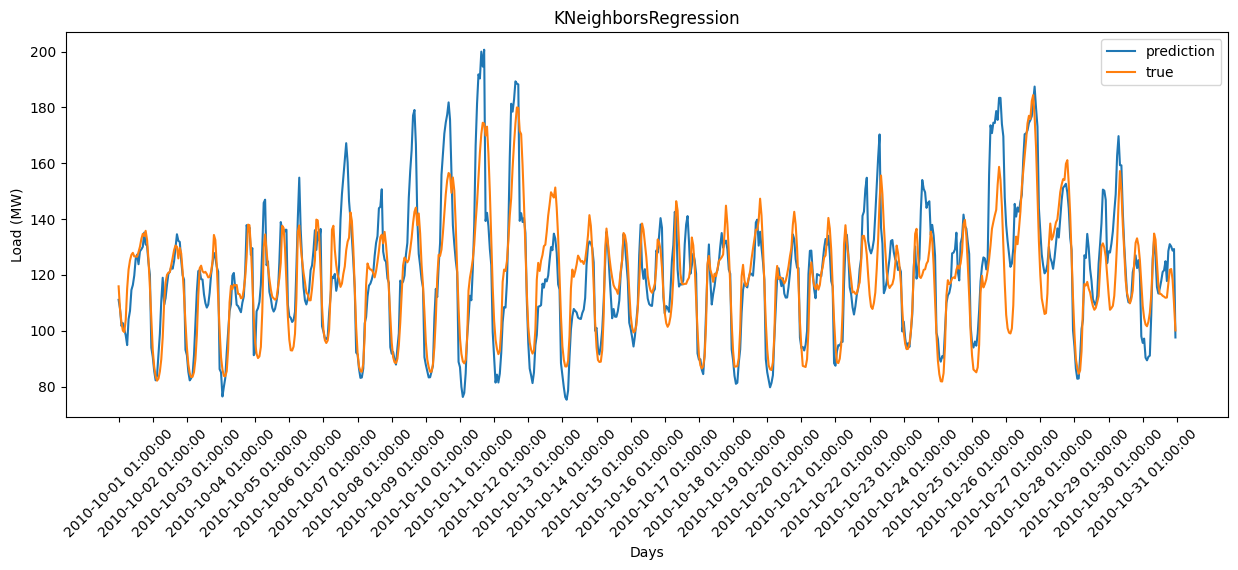

In [6]:

plt.figure(figsize=(15,5))
plt.plot(y_hat, label="prediction")
plt.plot(df_test["DS"],y_test, label="true")

plt.xticks(np.arange(0, len(y_test)+1, 24),rotation=45)
plt.xlabel("Days")
plt.ylabel("Load (MW)")
plt.title("KNeighborsRegression")
plt.legend()
plt.show()

In [6]:
np.sqrt(mean_squared_error(y_test, y_hat))

12.542889929954429

In [7]:
# pickle.dump(gs_cv_ts,open("/Users/luca/Desktop/ThesisKernelMethods/dataset_applications/knn.pkl","wb"))